In [69]:
# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
# Sk learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [70]:
# Make by default all fig sized 10 ,6
plt.rcParams["figure.figsize"] = (10,6)

In [71]:
from sklearn.datasets import make_moons

# Number of examples
n_examples = 3000

# Train and test data sets
X,y = make_moons(n_examples,
                 noise=0.1,
                 random_state=42)
# Check the features
X

array([[ 0.06109728, -0.14774355],
       [-0.89271911,  0.57291225],
       [ 0.34345014, -0.15428805],
       ...,
       [-0.80062802,  0.66700292],
       [-0.78775314,  0.3822885 ],
       [-0.12474442,  1.03856113]])

In [72]:
# Check the first 10 labels
y[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [73]:
# Split data into training and testing
X_train , y_train = X[:2500],y[:2500]
X_test, y_test = X[2500:],y[2500:]

# View their shapes
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2500, 2), (2500,), (500, 2), (500,))

In [74]:
moons = pd.DataFrame({"X0":X[:,0],
                      "X1":X[:,1],
                      "LABELS":y})
moons.head()

,X0,X1,LABELS
0,0.061097,-0.147744,1
1,-0.892719,0.572912,0
2,0.343450,-0.154288,1
3,0.827035,0.500476,0
4,1.469687,-0.366766,1


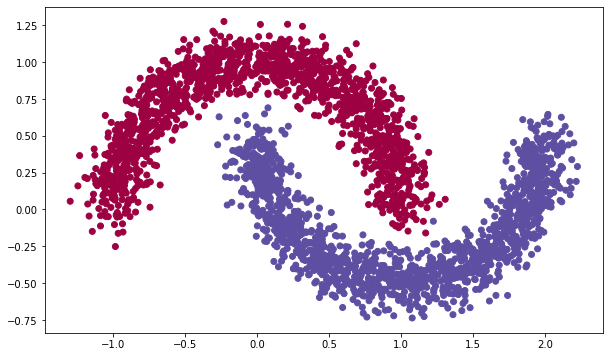

In [75]:
# Time to scatter plot our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral);

# Lets first make some functions to evaluate the model performances

In [76]:
def plot_history(history):
  """
  Plots the history curves of the model
  """
  pd.DataFrame(history.history).plot()
  plt.ylabel("Loss")
  plt.xlabel("Epochs")

In [77]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [78]:
# Lets make a confusion matrix from scrathc
import itertools

# Create a function for the confugion matrix
def plot_conf_matrix(y_test,y_preds,classes=False,figsize=(15,15),textsize=15):
  """
  Takes as input the y_test and the y_preds
  and then plots a confusion matrix
  """
  # Create the confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=(figsize))
  # Create a matrix plot 
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion matrix",
         xlabel="Predicted Label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=textsize)
  plt.show()

# Time to build our models

In [110]:
# Build first model with 5 hidden layers and 1 output layer

# Set up random seed
tf.random.set_seed(42)

# Build model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose = 0)

# Evaluate the model
model_1.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9080


[0.20155677199363708, 0.9079999923706055]

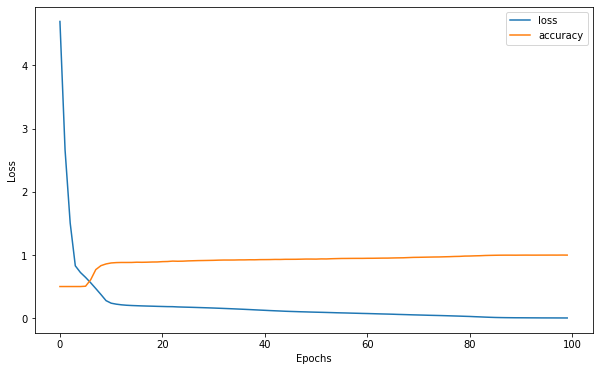

In [106]:
plot_history(history_1)

doing binary classifcation...


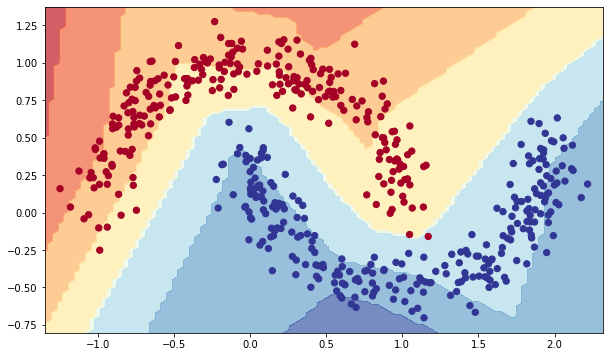

In [107]:
plot_decision_boundary(model_1,X_test,y_test)

doing binary classifcation...


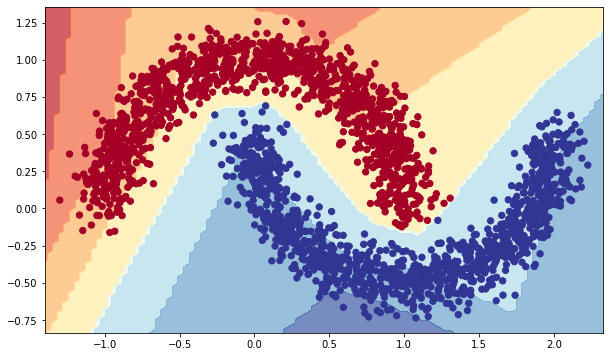

In [108]:
plot_decision_boundary(model_1,X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


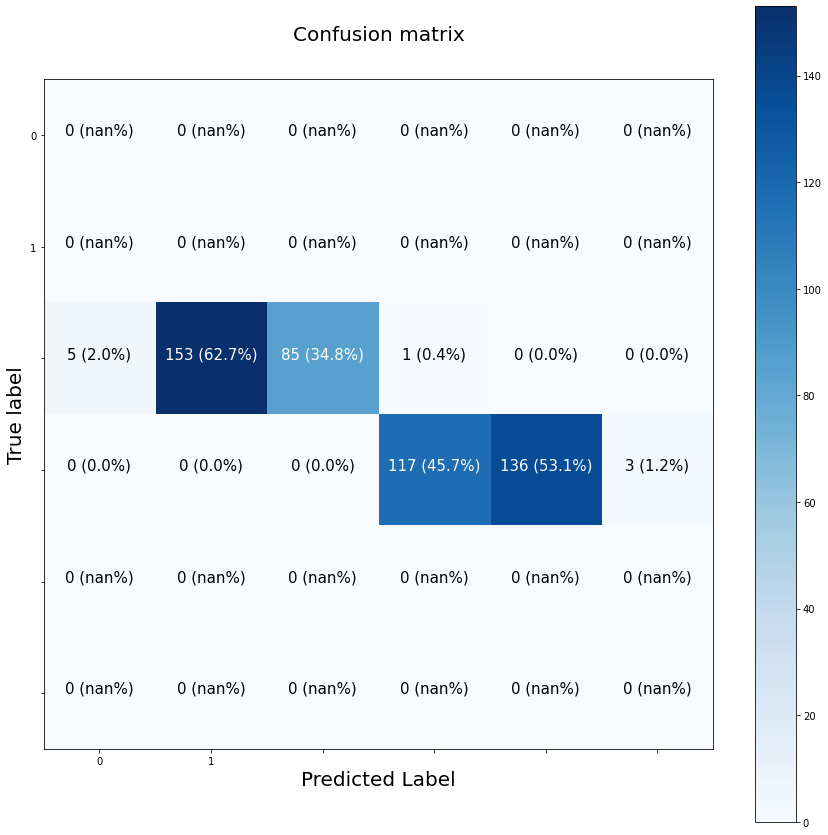

In [109]:
y_preds = model_1.predict(X_test)
plot_conf_matrix(y_test,y_preds,classes = [0,1])

## Lets see if we can improve the model any further

In [89]:
# Build a moel to find the best learning rate
# Set up random seed
tf.random.set_seed(42)

# BUild the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])


# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Setup lr scheduler 
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks = [lr_schedule],
                        verbose = 0)

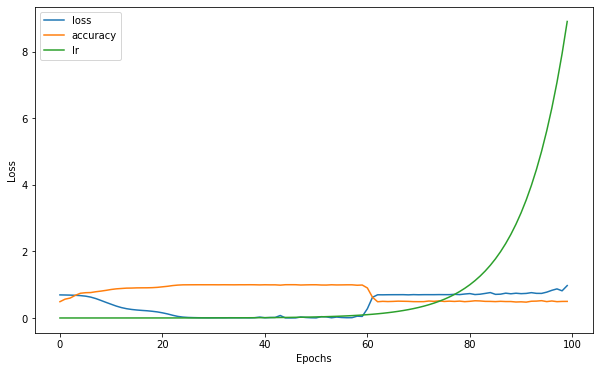

In [90]:
plot_history(history_2)

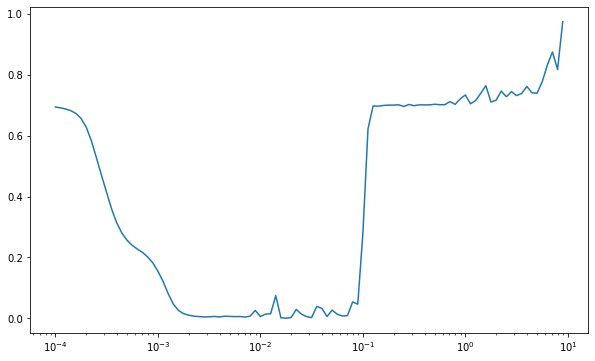

In [93]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.semilogx(lrs,history_2.history["loss"])

As we can see the perfect learning rate is :10 ** -3 (0.001) (default adam lr = 0.001) so lets build a model with the perfect lr and a callback function

In [111]:
# Build best model
# Set up random seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Set up callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)

# Fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs = 400,
                        callbacks=[callback],
                        verbose=0)

# Evaluate the model 
model_3.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9980


[0.008074304088950157, 0.9980000257492065]

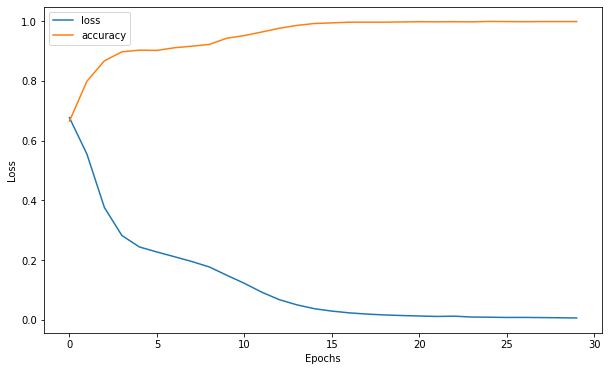

In [112]:
plot_history(history_3)

doing binary classifcation...


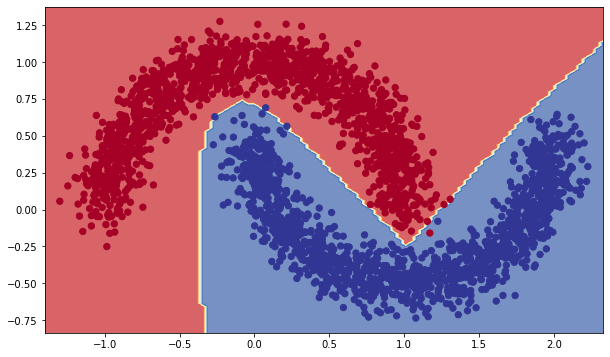

In [113]:
plot_decision_boundary(model_3,X,y)

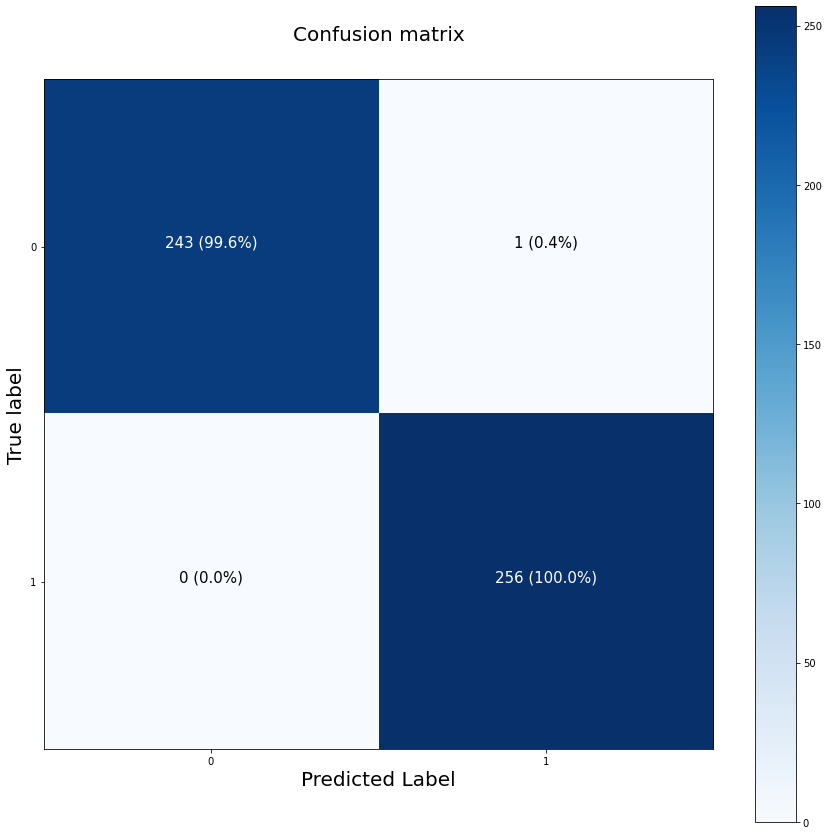

In [114]:
y_preds = model_3.predict(X_test)
plot_conf_matrix(y_test,y_preds)

In [119]:
loss_1 , accuracy_1 = model_1.evaluate(X_test,y_test)
loss_2 , accuracy_2 = model_2.evaluate(X_test,y_test)
loss_3 , accuracy_3 = model_3.evaluate(X_test,y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9980


In [120]:
model_results = [["model 1",loss_1,accuracy_1],
                 ["model 2",loss_2,accuracy_2],
                 ["model 3",loss_3,accuracy_3]]
model_results

[['model 1', 0.20155677199363708, 0.9079999923706055],
 ['model 2', 0.9538673758506775, 0.5120000243186951],
 ['model 3', 0.008074304088950157, 0.9980000257492065]]

In [135]:
# Turn results into a dataframe
model_results_df = pd.DataFrame(model_results,columns=["model","loss","accuracy"])
model_results_df

,model,loss,accuracy
0,model 1,0.201557,0.908
1,model 2,0.953867,0.512
2,model 3,0.008074,0.998


## Time to plot the model results

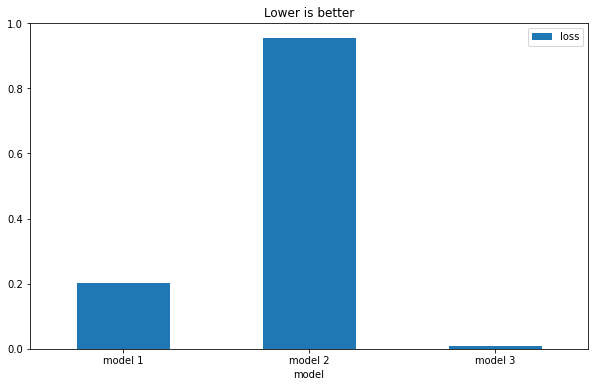

In [145]:
model_results_df.plot(x="model",y="loss",kind="bar")
plt.xticks(rotation= "horizontal")
plt.title("Lower is better");

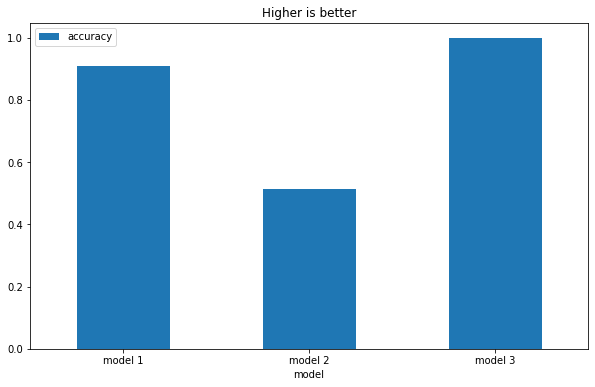

In [146]:
model_results_df.plot(x="model",y="accuracy",kind="bar")
plt.xticks(rotation="horizontal")
plt.title("Higher is better");